# **PHASE ONE:  MICROSOFT MOVIE STUDIO PROJECT**

## 1.0 INTRODUCTION

<img src = "Images/gr-stocks-q8P8YoR6erg-unsplash.jpg">

Photo from  <a href="https://unsplash.com/photos/q8P8YoR6erg">Unsplash</a>

**1.1 PROJECT OVERVIEW**

To use Explanatory Data Analysis(EDA) to generate actionable insights to the head of Microsoft's new movie studio, that he/she can use to decide what type of films to create.

**1.2 BUSINESS UNDERSTANDING**

Microsoft has noticed that many major companies are successfully creating original video content, and they want to join the excitement. To do so, they have made the bold decision to establish a new movie studio. However, Microsoft lacks experience in the film industry, leaving them uncertain about the types of movies that perform best at the box office. Thus, they seek to explore and analyze the current trends and successful genres in the movie industry.

Project Objective:

The main objective of this project is to conduct thorough research and analysis on the types of films that are currently enjoying the greatest success. These findings will play a crucial role in guiding the decision-making process, helping Microsoft determine the most promising genres for their upcoming movie projects.

# **2.0 DATA UNDERSTANDING**

**2.1 SOURCES & PROPERTIES OF DATA**

The data sources for this analysis will be pulled from five separate files:

1. #### `bom.movie_gross.csv`

   A csv file with the following columns: Movie title, studio, domestic_gross, foreign_gross & year of release.
   
2. #### `title.basics.csv`

   A csv file with the following columns: tconst(unique identifier of the movie titles), primary_title, original_title,     start_year, runtime_minutes, genres.

3. #### `title.ratings.csv`
   A csv file with the following columns: tconst(unique identifier of the movie titles), averegarating, numvotes.

4.  #### `tmdb.movies.csv`
    A csv file with the following columns: genre_ids, Id, original_language, original_title, popularity, release_date, title, vote average, vote_count.

5.  #### `tn.movie_budgets.csv`
    A csv file with the following columns: Id, release_date, movie, production_budget, domestic_gross.

All the files are stored in a folder called data.

**2.2 IMPORTING NECESSARY LIBRARIES**

In [2]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**2.3 LOADING DATASETS**

In [3]:
# loading all cvs files into dafaframes using pandas
gross_df = pd.read_csv('data/bom.movie_gross.csv')
basics_df = pd.read_csv('data/title.basics.csv')
ratings_df = pd.read_csv('data/title.ratings.csv')
votes_df =  pd.read_csv('data/tmdb.movies.csv')
budget_df = pd.read_csv('data/tn.movie_budgets.csv')

# **3.0 EXPLORING DATAFRAMES**

 # **1. gross_df**

In [4]:
# the first 5 rows in the gross_df dataframe
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# checking the summary of gross_df i.e., number of rows and columns, column names, missing values and datatype
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Breakdown of each column from the above gross_df information;

  title : It contains 3387 non-null objects.
  
  studio : It contains 3382 non-null objects (strings) representing the movie studios. There are 5 missing values in this   column.
  
  domestic_gross: It contains 3359 non-null float64 values. There are 28 missing values in this column.
  
foreign_gross: It contains 2037 non-null objects (strings) representing the foreign gross earnings for movies. There are 1350 missing values in this column.

year: It contains 3387 non-null integer values, representing the years of the movies.

In [6]:
# checking the shape of gross_df i.e number of rows and columns
gross_df.shape

(3387, 5)

The gross dataframe has 3387 rows and 5 columns

In [7]:
# checking the descriptive statistical summary of gross_df
gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


# **2. basics_df**

In [8]:
# the first 5 rows in the basics dataframe
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
# checking the summary of basics_df i.e., number of rows and columns, column names, missing values and datatype
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Breakdown of each column from the above basics_df information;

tconst: This column contains unique identifiers (object type) for each entry. All rows in this columns have values

primary_title: This column contains the primary title (object type) of a movie. All rows in this columns have values

original_title: This column contains the original title (object type) of a movie. There are 21 missing values for this column.

start_year: This column contains the start year (int64 type) of a movie.

runtime_minutes: This column contains the runtime in minutes (float64 type) of a movie or show. There are 31,739 missing values in this column

genres: This column contains the genres (object type). There are 5,408 missing values in this column.

In [10]:
# shape of basics_df i.e number of rows and columns
basics_df.shape

(146144, 6)

basics_df has 146144 rows and 6 columns

In [11]:
# descriptive statistical summary of basics_df
basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


## **3. ratings_df**

In [12]:
# the first 5 rows in rating df
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
# summary of ratings_df
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Breakdown of each column from the above rating_df information;

tconst: This column contains unique identifiers (object type) for each entry. All rows in this columns have values

averagerating: This column contains the average rating (float64 type) of a movie. All rows in this columns have values

numvotes: This column contains the number of votes (int64 type) received by a movie. All rows in this columns have values


In [14]:
# shape of rating df
ratings_df.shape

(73856, 3)

ratings dataframe has 73856 rows and 3 columns

In [15]:
# descriptive statistical summary of rating_df
ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


## **4. votes_df**

In [16]:
# last 5 rows in votes df
votes_df.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [17]:
# summary of votes_df
votes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Breakdown of each column from the above votes_df information;

Unnamed: 0: The index column.

genre_ids: This column contains object-type data. All values are present in this column

id: This column contains integer values (int64 type). All values are present in this column

original_language: This column contains object-type data, representing the original language of the movie. All values are present in this column.

original_title: This column contains object-type data, representing the original title of the movie. All values are present in this column

popularity: This column contains float64 values, indicating the popularity of the movie. All values are present in this column

release_date: This column contains object-type data, representing the release date of the movie. All values are present in this column.

title: This column contains object-type data, representing the title of the movie. All values are present in this column

vote_average: This column contains float64 values, representing the average vote or rating for the movie. All values are present in this column

vote_count: This column contains integer values (int64 type), representing the number of votes received by the movie. All values are present in this column

In [18]:
# shape of votes dataframe
votes_df.shape

(26517, 10)

Votes dataframe has 26517 rows and 10 columns

In [19]:
# descriptive statistical summary of votes_df
votes_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


## **5. budget_df**

In [20]:
# last 5 rows of budget dataframe
budget_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [21]:
# summary budget df
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Breakdown of each column from the above budget_df information;

id: This column contains integer values (int64 type).

release_date: This column contains object-type data, representing the release date of the movies.

movie: This column contains object-type data, representing the names of the movies.

production_budget: This column contains object-type data, representing the production budget of each movie.

domestic_gross: This column contains object-type data, representing the domestic gross earnings of each movie.

worldwide_gross: This column contains object-type data, representing the worldwide gross earnings of each movie.

The DataFrame has no missing values

In [22]:
# shape of budget df
budget_df.shape

(5782, 6)

budget_df has 5782 rows and 6 columns

# **4.0 DATA CLEANING**


Data cleaning involves the preparation of data for analysis by removing irrelevant or incorrect information that could adversely impact the performance of models or algorithms. It includes identifying and handling missing values, correcting incorrect data, and reducing duplicates. 
I analysed each dataset separately because I have 5 different dataframes.


 ## **4.1. gross_df**

In [23]:
gross_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [24]:
# checking for any missing value in the dataframe
gross_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

There are 5 missing values in studio column, 28 missing values in domestic_gross and 1350 missing values in foreign_gross

In [25]:
# drop all the missing values studio column
gross_df.dropna(subset=['studio'], inplace=True)

In [26]:
# replace the missing values in the domestic gross column with their mean
mean_domestic_gross = gross_df["domestic_gross"].mean()
gross_df["domestic_gross"].fillna(mean_domestic_gross, inplace=True)

In [27]:
# drop all the missing rows in domestic_gross
gross_df.dropna(subset=['foreign_gross'], inplace=True)

In [28]:
gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [29]:
# checking for duplicates in the gross dataframe
gross_df.duplicated().sum()

0

No duplicated values in gross_df

In [ ]:
# checking for all unique values in the dataframe
gross_df.nunique()

In [31]:
# removing the quotations and commas in the foreign gross column
gross_df['foreign_gross'] = gross_df['foreign_gross'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [32]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2033 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2033 non-null   float64
 3   foreign_gross   2033 non-null   float64
 4   year            2033 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.3+ KB


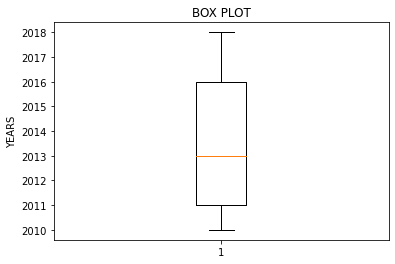

In [33]:
# checking for outliers in year column
plt.boxplot(data=gross_df, x="year");
# plt.xlabel('Data')
plt.ylabel('YEARS')
plt.title('BOX PLOT');
plt.show()

There are no missing values or outliers in this dataset.

## **4.2. basics_df**

On to the next dataset; basics dataframe

In [34]:
basics_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [35]:
# checking for duplicates
basics_df.duplicated().sum()

0

No duplicated values in this dataframe

In [36]:
# checking for uniques values
basics_df.nunique()

tconst             146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

In [37]:
# checking for duplicates in the primary_title, start_year columns
basics_df.duplicated(['primary_title','start_year']).sum()

2072

The two columns have 2072 duplicated values.

In [38]:
# dropped all the 2072 duplicated values in the two columns
# keep="first":  Keeps the first occurrence of the duplicates and removes subsequent duplicates.
basics_df.drop_duplicates(["primary_title","start_year"], keep="first", inplace=True)

In [39]:
# checking for duplicates in the primary_title, start_year columns
basics_df.duplicated(['primary_title','start_year']).sum()

0

In [40]:
# checking for missing values
basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        18
start_year             0
runtime_minutes    31218
genres              5192
dtype: int64

original_title has 18 missing values, runtime_minutes has 31218 missing values & genres has 5192 missing values

In [41]:
# dropped the original title column since we have primary_title columns which does not have any missing values
basics_df = basics_df.drop('original_title', axis = 1)

In [42]:
# dropping all the missing values in genre column
basics_df = basics_df.dropna(subset=['genres'])

In [43]:
# calculating the % of missing values in runtime_minuts
# length = sum(basics_df['runtime_minutes'])
# # length
# len_missing = sum(basics_df['runtime_minutes'].isna())
# len_missing
# # percentage_missing = (len_missing/length) * 100
# # percentage_missing = round(percentage_missing, 0)
# # print('The percentage of missing values in runtime_minutes is : ', percentage_missing, '%')

In [44]:
# decided to drop all the missing values in the runtime_minutes column
basics_df = basics_df.dropna(subset=['runtime_minutes'])

In [45]:
# recheck for missing values 
basics_df.isna().sum()

tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

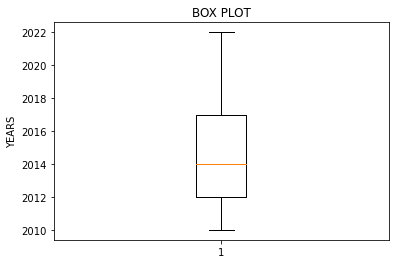

In [46]:
# checking for outliers In the years column
plt.boxplot(data=basics_df, x='start_year')
# plt.xlabel('Data')
plt.ylabel('YEARS')
plt.title('BOX PLOT');
plt.show()

There are no outliers in the years column

## **4.3. ratings_df**

In [47]:
 # first 3 rows in rating dataframe
ratings_df.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [48]:
# checking for duplicates
ratings_df.duplicated().sum()

0

In [49]:
# checking for duplicated values in the tconst column
ratings_df['tconst'].duplicated().sum()

0

In [50]:
print(f'There are {ratings_df.duplicated().sum()} values in the rating dataframe')

There are 0 values in the rating dataframe


In [51]:
print(f'There are {ratings_df["tconst"].duplicated().sum()} values in the tconst column')

There are 0 values in the tconst column


In [52]:
# checking for missing values
ratings_df.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

No missing values the rating dataframe

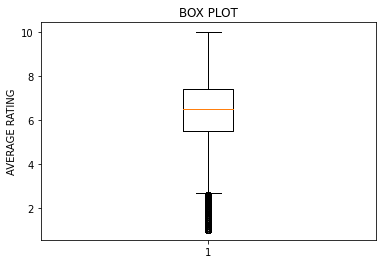

In [53]:
# checking for outliers in the averagerating column
plt.boxplot(data=ratings_df, x='averagerating')
plt.ylabel('AVERAGE RATING')
plt.title('BOX PLOT');
plt.show()

Despite the presence of several outliers in the average rating column, I have chosen to disregard them as they represent legitimate and significant data points. Altering or eliminating these genuine outliers may result in the loss of valuable information and could potentially distort the true representation of the data.

## **4.4. votes_df**

In [54]:
# last 3 rows in the dataframe
votes_df.tail(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [55]:
# the dataframe has a column(unnamed:0)
# dropping the column
votes_df.drop("Unnamed: 0", axis=1, inplace=True)

In [56]:
# checking if the column has been dropped
votes_df.tail(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [57]:
# checking for duplicates
votes_df.duplicated().sum()

1020

In [58]:
# checking for duplicates in different colums in the dataframe
votes_df.duplicated(['original_title', 'release_date','title']).sum()

1026

In [59]:
# dropping all the duplicated columns the dataframe
votes_df.drop_duplicates(['original_title', 'release_date','title'], keep='first', inplace=True)

In [60]:
# rechecking for duplicates
votes_df.duplicated(['original_title', 'release_date','title']).sum()

0

In [61]:
# checking for missing values
votes_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

The dataframe has Zero missing values

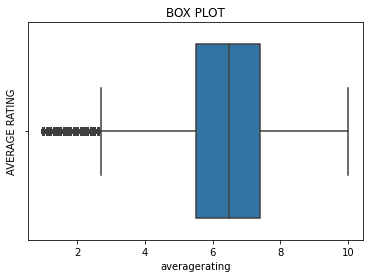

In [62]:
# checking for outliers in the vote_average column
sns.boxplot(data=ratings_df, x='averagerating')
plt.ylabel('AVERAGE RATING')
plt.title('BOX PLOT')
plt.show()

Despite the presence of several outliers in the average rating column, I have chosen to disregard them as they represent legitimate and significant data points. Altering or eliminating these genuine outliers may result in the loss of valuable information and could potentially distort the true representation of the data.

## **4.5. budget_df**

In [63]:
# checking the last 3 rows in the dataframe
budget_df.tail(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [64]:
# checking for duplicated values
budget_df.duplicated().sum()

0

In [65]:
# checking for duplicates in specific columns within the df
budget_df.duplicated(['release_date','movie']).sum()

0

In [66]:
# checking for missing values
budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [67]:
# checking if the datatypes of in the columns have the correct dataframe
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The datatype for release_date should be in date format. The data type for production_budget, domestic_gross, and worlwide_gross
should be float.

In [68]:
# Changing the Format of release_date into the pandas date format
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])

In [69]:
# I want to operate on multiple columns hence put them in a list:
budget_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# replacing all the symbols charaters in the 3 columns
budget_df[budget_cols] = budget_df[budget_cols].replace({'\$': '', ',': ''}, regex=True)

In [70]:
# Converting the budget and gross columns into the integer datatype
budget_df[budget_cols] = budget_df[budget_cols].astype(np.int64)

In [71]:
# recheking if the above changes have been effected
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


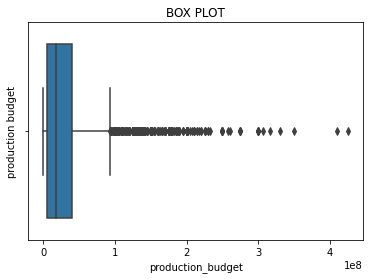

In [72]:
# checking for outliers in the production_budget column
sns.boxplot(data=budget_df, x='production_budget')
plt.ylabel('production budget')
plt.title('BOX PLOT')
plt.show()

In [73]:
# the max and min values in the production_budget column
print(f"The highest Amount in the production budget is: {budget_df['production_budget'].max()}")
print(f"The smallest Amount in the production budget is: {budget_df['production_budget'].min()}")

The highest Amount in the production budget is: 425000000
The smallest Amount in the production budget is: 1100


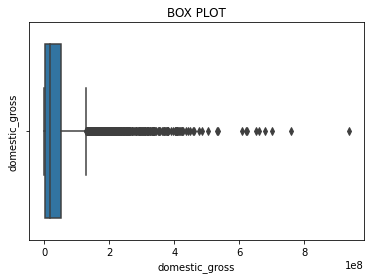

In [74]:
sns.boxplot(data=budget_df, x='domestic_gross')
plt.ylabel('domestic_gross')
plt.title('BOX PLOT')
plt.show()

In [75]:
# the max and min values in the domestic_gross column
print(f"The highest Amount in the domestic_gross is: {budget_df['domestic_gross'].max()}")
print(f"The smallest Amount in the domestic_gross is: {budget_df['domestic_gross'].min()}")

The highest Amount in the domestic_gross is: 936662225
The smallest Amount in the domestic_gross is: 0


In [76]:
# the max and min values in the worldwide_gross column
print(f"The highest Amount in the worldwide_gross is: {budget_df['worldwide_gross'].max()}")
print(f"The smallest Amount in the worldwide_gross is: {budget_df['worldwide_gross'].min()}")

The highest Amount in the worldwide_gross is: 2776345279
The smallest Amount in the worldwide_gross is: 0


# **5.0 MERGING DATAFRAMES**

In [77]:
# Exploring the new cleaned dataframe so that i can know how to merge them
basics_df.head(3)

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama


In [78]:
ratings_df.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


Merging the basics & rating dataframes since the two dataframe have a shared column (tconst)

In [79]:
# merging basics and rating dfs on the tconst column
basics_and_ratings_df = basics_df.merge(ratings_df, on="tconst", how="inner")

# checking the new merged df the first 5 rows
basics_and_ratings_df.head(5)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [80]:
# checking the first 5 rows in the df
basics_and_ratings_df.head(5)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [81]:
basics_and_ratings_df.shape

(65009, 7)

The new merged basics_and_ratings_df has 65009 rows and 7 columns

In [82]:
gross_df.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010


In [83]:
votes_df.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


Merging the votes & gross dataframes using the title column, which is present in both dataframes

In [84]:
# Merged the votes and gross dataset using the title column
votes_and_gross_df = votes_df.merge(gross_df, on="title", how="inner")

# Confirming the necessary columns are in the new dataset 
votes_and_gross_df.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010
2,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010
3,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010
4,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010


In [85]:
# In the votes and gross merged dataset I dropped the genre ids column
votes_and_gross_df.drop(["genre_ids"], axis = 1, inplace = True)

In [86]:
votes_and_gross_df.head(5)

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
1,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010
2,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010
3,10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010
4,20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010


In [87]:
votes_and_gross_df.shape

(1596, 12)

The new merged votes_and_gross dataframe has 1596 rows and 11 columns

## Checking for duplicates & missing values in the new formed dataframes

### **basics_and_ratings_df**

In [88]:
# checking for the first 3 rows in the df
basics_and_ratings_df.head(3)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


In [89]:
# checking for duplicates in the dataframe, primary_title column
basics_and_ratings_df.duplicated(['primary_title']).sum()

2669

The column "primary_title" has 2669 duplicated values

In [90]:
# dropping all duplicates
basics_and_ratings_df.drop_duplicates(['primary_title'], keep='first', inplace = True)

In [91]:
# rechecking if the drop_duplicates was effective
basics_and_ratings_df.duplicated(['primary_title']).sum()

0

In [92]:
basics_and_ratings_df.shape

(62340, 7)

In [93]:
basics_and_ratings_df.isna().sum()

tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [94]:
# dropped all missing values in the genre column
basics_and_ratings_df.dropna(subset=['genres'], inplace=True)

In [95]:
# calculating the % of missing values in the runtime_minuts column

missing_values_count = (basics_and_ratings_df['runtime_minutes'].isnull()).sum()
# missing_values_count
runtime_minutes_count = basics_and_ratings_df.shape[0]
percentage_of_missing = (missing_values_count/runtime_minutes_count)*100
percentage_of_missing = round(percentage_of_missing, 0)
print('The percentage of missing values in runtime_minutes is : ', percentage_of_missing, '%')

The percentage of missing values in runtime_minutes is :  0.0 %


Given that the % of missing values is 10% We can replace the missing values with the median

In [96]:
# replacing all the missing values median
median_value = basics_and_ratings_df['runtime_minutes'].median()
basics_and_ratings_df['runtime_minutes'].fillna(median_value, inplace=True)

In [97]:
# rechecking for any missing values
basics_and_ratings_df.isna().sum()

tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [98]:
# new shape of basic_and_rating_df
basics_and_ratings_df.shape

(62340, 7)

 The basics_and_rating_df is clean; no duplicates or missing values

## **votes_and_gross_df**

In [99]:
#  checking for the first 3 rows in the df
votes_and_gross_df.head(3)

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
1,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010
2,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010


In [100]:
# checking for duplicates
votes_and_gross_df.duplicated(['title','year']).sum()

97

In [101]:
# dropping the duplicates
votes_and_gross_df.drop_duplicates(['title','year'], keep='first', inplace =True)

In [102]:
# recheck if the drop_duplicates was effective
votes_and_gross_df.duplicated(['title','year']).sum()

0

In [103]:
# checking for missing values 
votes_and_gross_df.isna().sum()

id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

In [104]:
votes_and_gross_df.shape

(1499, 12)

In [105]:
# for studio i dropped the missing value
votes_and_gross_df = votes_and_gross_df.dropna(subset = ['studio'])

In [106]:
# replacing the missing values with the median of each column
votes_and_gross_df['domestic_gross'].fillna(median_value, inplace=True)
votes_and_gross_df['foreign_gross'].fillna(median_value, inplace=True)

In [107]:
votes_and_gross_df.isna().sum()

id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

In [108]:
votes_and_gross_df.shape

(1499, 12)

The votes_and_gross_df is clean; no duplicates or missing values

# **Adding computed columns into the dataframes**

Adding additional columns which I will use in data analysis

In [109]:
# checking the first 5 rows in the df
votes_and_gross_df.head()

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
1,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010
2,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010
3,10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010
4,20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010


In [110]:
# dropping the unnecessary columns
votes_and_gross_df.drop(["domestic_gross","foreign_gross","release_date"], axis = 1, inplace = True)

In [111]:
votes_and_gross_df.head()

,id,original_language,original_title,popularity,title,vote_average,vote_count,studio,year
0,10191,en,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,7610,P/DW,2010
1,10138,en,Iron Man 2,28.515,Iron Man 2,6.8,12368,Par.,2010
2,27205,en,Inception,27.920,Inception,8.3,22186,WB,2010
3,10193,en,Toy Story 3,24.445,Toy Story 3,7.7,8340,BV,2010
4,20352,en,Despicable Me,23.673,Despicable Me,7.2,10057,Uni.,2010


I dropped the 'release_date', 'domestic_gross', and 'foreign_gross' columns since they already exist in the budget DataFrame.

In [112]:
# checking the 5 rows the budget dataframe
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In the above dataframe(budget_df), I'm going to add 3 new columns:
1. 'total_gross' which will be the summation of domestic_gross and worldwide_gross
2.  'month' the month column will represent the month each movie was released
3.  'profit' will represent the profit made from each movie i.e,. total_gross minus production_budget

In [113]:
# adding total_gross columns
budget_df["total_gross"] = budget_df["domestic_gross"] + budget_df["worldwide_gross"] 

In [114]:
# extracting the month from the release_date column using datetime function 
budget_df["month"] = budget_df["release_date"].dt.month

In [115]:
# adding profit column
budget_df["profit"] = budget_df["total_gross"] - budget_df["production_budget"] 

In [116]:
# checking if the above code were effective
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,month,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3536852904,12,3111852904
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,5,876127750
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,192524700,6,-157475300
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,5,1531419831
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,12,1619903129


In [117]:
# # dropped the id and release dates column
budget_df.drop(["release_date","id"], axis = 1, inplace = True)

In [118]:
budget_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,total_gross,month,profit
0,Avatar,425000000,760507625,2776345279,3536852904,12,3111852904
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,5,876127750
2,Dark Phoenix,350000000,42762350,149762350,192524700,6,-157475300
3,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,5,1531419831
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,12,1619903129


The shared column in the budget_df & basics_and_ratings_df is movie & primary_title, but they have different naming, so i decided to change the primary_title column to movie so that i can have a shared column for merging.

In [119]:
basics_and_ratings_df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [120]:
# renaming the primary_title column to movie
basics_and_ratings_df.rename(columns={"primary_title": "movie"}, inplace=True)

In [121]:
basics_and_ratings_df.tail()

,tconst,movie,start_year,runtime_minutes,genres,averagerating,numvotes
65003,tt9910930,Jeg ser deg,2019,75.0,"Crime,Documentary",6.1,7
65004,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65005,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5
65006,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
65007,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [122]:
# merging the basics_and_ratings_df with budget_df
basics_and_budget_df = basics_and_ratings_df.merge(budget_df, on="movie", how="inner")
basics_and_budget_df.head()

,tconst,movie,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,total_gross,month,profit
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,45000000,0,73706,73706,12,-44926294
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,25000000,720828,9313302,10034130,3,-14965870
2,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,91000000,58236838,187861183,246098021,12,155098021
3,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,28000000,26017685,62108587,88126272,9,60126272
4,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,215000000,652270625,1648854864,2301125489,6,2086125489


In [123]:
basics_and_budget_df.shape

(2149, 13)

The new basics_and_budger_df has 2149 rows and 13 columns

Next i merged the votes_and_gross_df with the basics_and_budget_df

In [124]:
votes_and_gross_df.head()

,id,original_language,original_title,popularity,title,vote_average,vote_count,studio,year
0,10191,en,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,7610,P/DW,2010
1,10138,en,Iron Man 2,28.515,Iron Man 2,6.8,12368,Par.,2010
2,27205,en,Inception,27.920,Inception,8.3,22186,WB,2010
3,10193,en,Toy Story 3,24.445,Toy Story 3,7.7,8340,BV,2010
4,20352,en,Despicable Me,23.673,Despicable Me,7.2,10057,Uni.,2010


In [125]:
# renaming the title column to movie so that i can have a shared column within the two dataframe
votes_and_gross_df.rename(columns={"title": "movie"}, inplace=True)

In [126]:
# merging the basics_and_budget_df with votes_and_gross_df
movies = basics_and_budget_df.merge(votes_and_gross_df, on="movie", how="inner")
movies.head()

,tconst,movie,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,...,month,profit,id,original_language,original_title,popularity,vote_average,vote_count,studio,year
0,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,25000000,720828,9313302,...,3,-14965870,83770,en,On the Road,8.919,5.6,518,IFC,2012
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,91000000,58236838,187861183,...,12,155098021,116745,en,The Secret Life of Walter Mitty,10.743,7.1,4859,Fox,2013
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,28000000,26017685,62108587,...,9,60126272,169917,en,A Walk Among the Tombstones,19.373,6.3,1685,Uni.,2014
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,215000000,652270625,1648854864,...,6,2086125489,135397,en,Jurassic World,20.709,6.6,14056,Uni.,2015
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,45000000,13109815,21544732,...,10,-10345453,23514,en,The Rum Diary,12.011,5.7,652,FD,2011


In [127]:
movies.columns

Index(['tconst', 'movie', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'total_gross', 'month', 'profit', 'id',
       'original_language', 'original_title', 'popularity', 'vote_average',
       'vote_count', 'studio', 'year'],
      dtype='object')

The final movies dataframe has many unnecessary columns so i dropped them

In [128]:
# dropping tconst, start_year, id , vote_count, vote_average columns
movies.drop(["id","vote_average", "vote_count","studio","tconst","start_year"], axis = 1, inplace = True)

In [129]:
movies.head()

,movie,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,total_gross,month,profit,original_language,original_title,popularity,year
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,25000000,720828,9313302,10034130,3,-14965870,en,On the Road,8.919,2012
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,91000000,58236838,187861183,246098021,12,155098021,en,The Secret Life of Walter Mitty,10.743,2013
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116,28000000,26017685,62108587,88126272,9,60126272,en,A Walk Among the Tombstones,19.373,2014
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,215000000,652270625,1648854864,2301125489,6,2086125489,en,Jurassic World,20.709,2015
4,The Rum Diary,119.0,"Comedy,Drama",6.2,94787,45000000,13109815,21544732,34654547,10,-10345453,en,The Rum Diary,12.011,2011


In [130]:
# dropping numvotes & original_title columns
movies.drop(["numvotes","original_title"], axis = 1, inplace = True)

In [131]:
movies.tail()

,movie,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,total_gross,month,profit,original_language,popularity,year
996,BlacKkKlansman,135.0,"Biography,Crime,Drama",7.5,15000000,49275340,93017335,142292675,8,127292675,en,25.101,2018
997,"Paul, Apostle of Christ",108.0,"Adventure,Biography,Drama",6.7,5000000,17547999,25529498,43077497,3,38077497,en,12.005,2018
998,Instant Family,118.0,"Comedy,Drama",7.4,48000000,67363237,119736188,187099425,11,139099425,en,22.634,2018
999,Hereditary,127.0,"Drama,Horror,Mystery",7.3,10000000,44069456,70133905,114203361,6,104203361,en,26.185,2018
1000,Red,90.0,Drama,8.1,60000000,90380162,196439693,286819855,10,226819855,en,0.600,2010


In [132]:
movies.shape

(1001, 13)

Now i have my final dataframe(with 1001 rows and 13 columns) which i will use in data analysis

# **6.0 DATA ANALYSIS**

## 6.1 Genres Analysis

In genre analysis I will explore the distribution of movies genre i.e,. to check which genres are the most popular, most profitable, and the genres with highest production budget.

### 6.1.1. Most Popular Genres

One row of a genre column has different genres in it so I split them.

In [133]:
# Splitting the genres into a list of individual genres
movies['genres'] = movies['genres'].str.split(',')

In [134]:
# .exclode is used to split the elements in a list to indivual rows
genre_counts = movies['genres'].explode().value_counts()

In [135]:
# checking the count of @ unique value in the genre column
genre_counts.unique

<bound method Series.unique of Drama          471
Comedy         364
Action         326
Adventure      277
Thriller       177
Crime          161
Romance        131
Horror          99
Sci-Fi          96
Mystery         89
Biography       87
Fantasy         86
Animation       82
Family          65
History         30
Music           28
Sport           18
Documentary     10
War              6
Western          5
Musical          3
Name: genres, dtype: int64>

In [136]:
# checking all the movie genres individually and assigning to a variable genres
genres = genre_counts.index

In [137]:
# checking all the values associated with @ genre  and assigning to a variable values
values = genre_counts.values

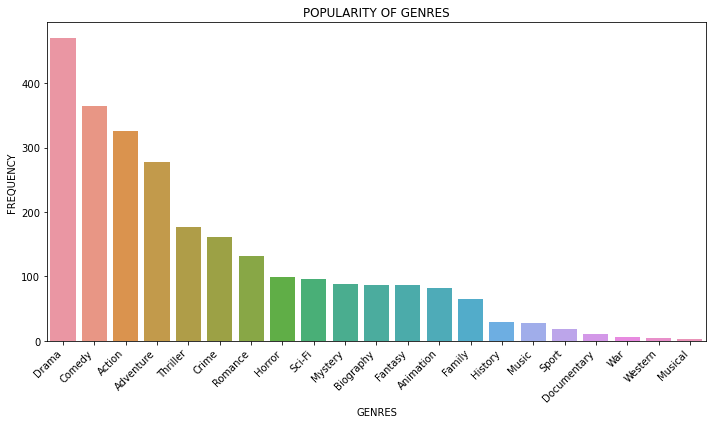

In [142]:
# a visualization to show the distribution of genres
plt.figure(figsize=(10, 6))
sns.barplot(x = genres, y=values)
# .xticks for setting the rotation of the chart and 
# ha(horizontal alignment) for preventing overlapping
plt.xticks(rotation=45, ha='right')
plt.xlabel('GENRES')
plt.ylabel('FREQUENCY')
plt.title('POPULARITY OF GENRES')
plt.tight_layout()

#Save the image
plt.savefig('most popular genres.png');

plt.show()

The five most popular genres are Drama, Comedy, Action, Adventure & Thriller

### 6.1.2 Most Profitable Genres

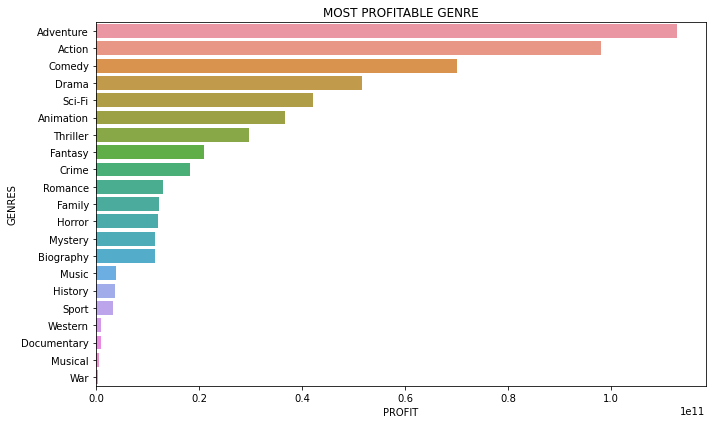

In [143]:
# .exclode is used to split the elements in a list to individual rows
genre_split = movies.explode('genres')

# Groupped the data by genre and calculated the total profit for each genre
genre_profit = genre_split.groupby('genres')['profit'].sum().reset_index()

# sorting the dataframe by profit column, Desc
most_profitable_genres = genre_profit.sort_values(by='profit', ascending=False)

# a barplot to visualize the most 
plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='genres', data=most_profitable_genres)
plt.xlabel('PROFIT')
plt.ylabel('GENRES')
plt.title('MOST PROFITABLE GENRE')
plt.tight_layout()
plt.savefig('most popular genres.png');

#Save the image
plt.savefig('most profitable genres.png');

plt.show()

The 5 most profitable genres are: Adventure, Action, Comedy, Drama and Sci-Fi

### 6.1.3 Highest Budget Genres

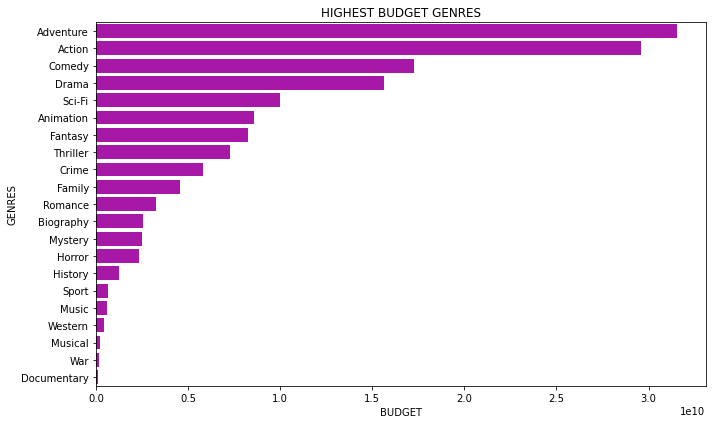

In [144]:
# .exclode is used to split the elements in a list to individual rows
genre_split = movies.explode('genres')

# Groupped the data by genre and calculated the total budget for each genre
genre_budget = genre_split.groupby('genres')['production_budget'].sum().reset_index()

# sorting the dataframe by production budget column, Desc
highest_budget = genre_budget.sort_values(by='production_budget', ascending=False)

# a barplot to visualize the most 
plt.figure(figsize=(10, 6))
sns.barplot(x='production_budget', y='genres', data=highest_budget, color ='m')
plt.xlabel('BUDGET')
plt.ylabel('GENRES')
plt.title('HIGHEST BUDGET GENRES')
plt.tight_layout()

# saving the graph
plt.savefig('highest budgets genres.png');

plt.show()

The top 5 most highest budget genres are Adventure, Action, Comedy, Drama and Sci-Fi.

## 6.2 Month of Release Analysis

For the Month of Release Analysis, I'll explore how the month of movie release influences its performance in terms of total gross revenue and profit generated.

### 6.2.1. Total Gross

In [146]:
# Groupped the data by the month of release 
# and calculated the total gross for each month
month_gross = movies.groupby('month')['total_gross'].sum().reset_index()

In [147]:
# sorting the month from jan to dec
month_gross['month'] = pd.Categorical(month_gross['month'], categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=True)
month_gross = month_gross.sort_values(by='month')

In [148]:
month_gross

,month,total_gross
0,1,9182418141
1,2,15297407087
2,3,17198688759
3,4,15752063583
4,5,27281229110
5,6,36514659515
6,7,31396777529
7,8,13728990888
8,9,11856109853
9,10,13719825670


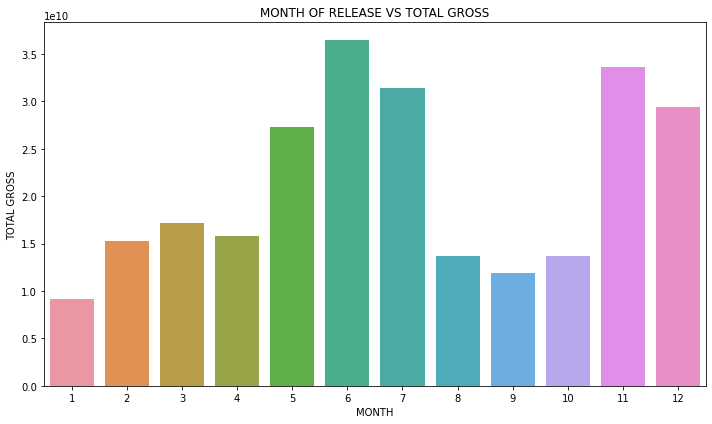

In [149]:
# bar plot to represent the month of release vs total gross
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_gross', data=month_gross)
plt.xlabel('MONTH')
plt.ylabel('TOTAL GROSS')
plt.title('MONTH OF RELEASE VS TOTAL GROSS')
# .plt.tight_layout() ensures that all the items fit without overlapping
plt.tight_layout()
# saving the graph
plt.savefig('month of release vs total gross.png');

plt.show()

The top 5 months the highest total gross are June, November, July, December & May.

### 6.2.2. Profit

In [150]:
# Groupped the data by the month of release 
# calculated the total gross for each month
month_gross1 = movies.groupby('month')['profit'].sum().reset_index()

month_gross1['month'] = pd.Categorical(month_gross1['month'], categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=True)
month_gross1 = month_gross1.sort_values(by='month') 
month_gross1

,month,profit
0,1,6792018141
1,2,12029407087
2,3,12596888759
3,4,12882163583
4,5,20952929110
5,6,29779759515
6,7,25192902529
7,8,10476990888
8,9,8982272203
9,10,10463725670


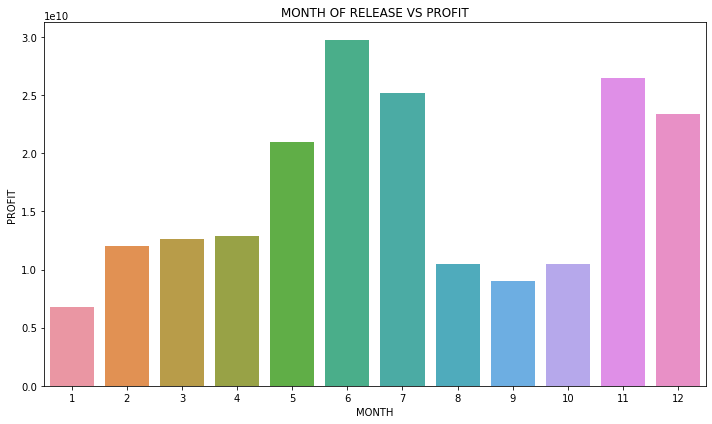

In [152]:
# bar plot to represent the month of release vs profit
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='profit', data=month_gross1)
plt.xlabel('MONTH')
plt.ylabel('PROFIT')
plt.title('MONTH OF RELEASE VS PROFIT')
# .plt.tight_layout() ensures that all the items fit without overlapping
plt.tight_layout()
# saving the graph
plt.savefig('month_of_release vs profit.png');

plt.show()

The top 5 months the highest profit are June, November, July, December & May.

## 6.3 Language Analysis

### 6.3.1. Most Popular Languages

For the Language Analysis, I will analyse the distribution of movies based on their original language. 

In [153]:
# checking the unique count of @ original language
language_counts = movies['original_language'].value_counts()
language_counts

en    983
fr      4
hi      3
ko      2
es      2
te      1
th      1
xx      1
de      1
da      1
el      1
hu      1
Name: original_language, dtype: int64

The original language with most movies is English. Next i will analyse the most popular language using the popularity column

In [154]:
# calculating the mean popularity for each language
most_pop = movies.groupby('original_language')['popularity'].mean()

# converting the above into a dataframe
most_pop_lang = pd.DataFrame(most_pop)
# resetting the index column
most_pop_lang.reset_index(drop=False, inplace=True)
most_pop_lang

,original_language,popularity
0,da,11.123000
1,de,5.577000
2,el,0.840000
3,en,14.164238
4,es,4.148500
5,fr,7.595250
6,hi,7.626000
7,hu,0.600000
8,ko,8.067500
9,te,10.406000


In [155]:
# sorting the dataframe DESC By popularity
most_pop_lang.sort_values('popularity', ascending=False)

,original_language,popularity
3,en,14.164238
0,da,11.123000
9,te,10.406000
8,ko,8.067500
6,hi,7.626000
5,fr,7.595250
1,de,5.577000
4,es,4.148500
2,el,0.840000
7,hu,0.600000


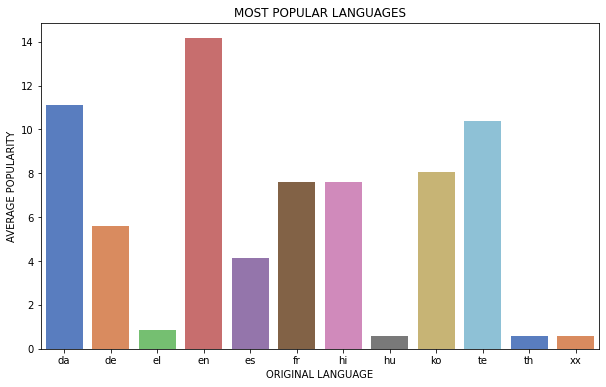

In [157]:
# visualizing the above dataframe using a barplot
languages = most_pop_lang['original_language']
popularity = most_pop_lang['popularity']

plt.figure(figsize=(10, 6))
sns.barplot(x = languages, y = popularity, palette='muted')
plt.xlabel('ORIGINAL LANGUAGE')
plt.ylabel('AVERAGE POPULARITY')
plt.title('MOST POPULAR LANGUAGES')
# saving the graph
plt.savefig('most popular languages.png');

plt.show()

The top 5 most popular languages are English, Danish, Telugu, Korean and Hindi.

### 6.3.2. Highest rated languages

In [158]:
# grouped the df by original language 
# calculated the averagerating for each language
high_rated = movies.groupby('original_language')['averagerating'].mean()

# changed the data into a dataframe
high_r_language = pd.DataFrame(high_rated)
# resetted the column index
high_r_language.reset_index(drop=False, inplace=True)

In [159]:
# sorted the df by averagerating DESC 
high_r_language.sort_values(by='averagerating', ascending=False)

,original_language,averagerating
1,de,9.200000
9,te,8.300000
4,es,7.350000
5,fr,7.300000
0,da,7.200000
10,th,7.100000
6,hi,6.666667
3,en,6.457172
7,hu,6.100000
2,el,5.500000


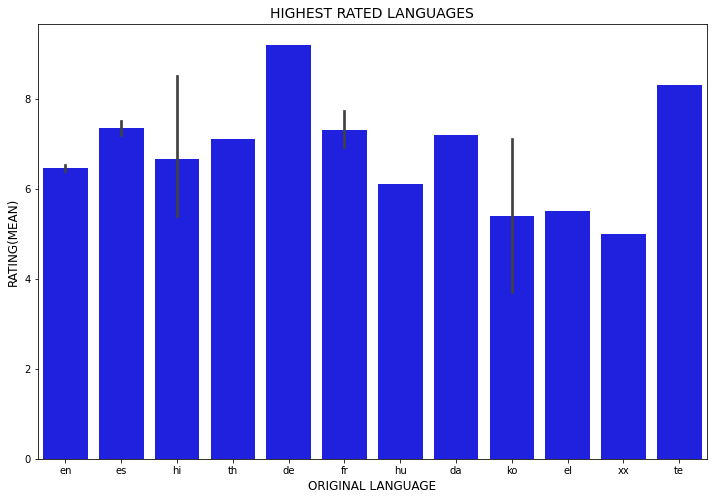

In [160]:
# plotting the above df
fig, ax = plt.subplots(figsize=(12,8))

language = movies['original_language']
rating = movies['averagerating']

sns.barplot(x = language  , y = rating, color = 'blue')
  
ax.set_title('HIGHEST RATED LANGUAGES', fontsize=14)
ax.set_xlabel("ORIGINAL LANGUAGE",fontsize=12)
ax.set_ylabel("RATING(MEAN)", fontsize=12)
# saving the graph
plt.savefig('highest rated languages');

plt.show()

The top 5 highest rated languages are German, Telugu, Spanish, French and Danish.

### 6.3.3. Most Profitable languages

In [161]:
# grouped the df by original language and
# calculated the mean profit for @ language
highest_profit = movies.groupby('original_language')['profit'].mean()

# changed the data into a dataframe
highest_profit_language = pd.DataFrame(highest_profit)
# resetted the column index
highest_profit_language .reset_index(drop=False, inplace=True)
# sorting the values by profit column DESC
highest_profit_language.sort_values(by='profit', ascending=False)

,original_language,profit
10,th,6.068887e+08
9,te,2.524887e+08
3,en,2.019697e+08
7,hu,1.301907e+08
6,hi,1.009808e+08
2,el,8.447625e+07
8,ko,1.978070e+07
0,da,1.544815e+07
5,fr,1.335976e+07
1,de,3.298326e+06


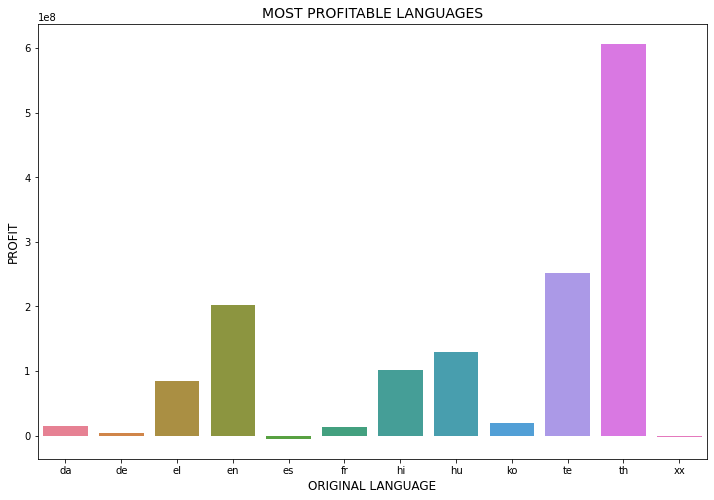

In [163]:
# visualizing the above dataframe
fig, ax = plt.subplots(figsize=(12,8))

language = highest_profit_language['original_language']
profit = highest_profit_language['profit']

sns.barplot(x = language  , y = profit, palette='husl')
  
ax.set_title('MOST PROFITABLE LANGUAGES', fontsize=14)
ax.set_xlabel("ORIGINAL LANGUAGE",fontsize=12)
ax.set_ylabel("PROFIT", fontsize=12)
# saving the graph
plt.savefig('most profitable languages.png');

plt.show()

The 5 most profitable languages are: Thai, Telegu, English, Hungarian and Hindi.

## 6.4 Correlation Analysis

Correlation analysis is a statistical technique used to quantify and understand the relationship between two or more variables in a dataset. It aims to determine whether and how two or more variables are related and the strength and direction of that relationship.

In a will use only the quantitative columns in the movies dataframe to check their correlation.

### 6.4.1 Correlation between all the columns

In [164]:
# checking columns in movies dataframe
movies.columns

Index(['movie', 'runtime_minutes', 'genres', 'averagerating',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'total_gross',
       'month', 'profit', 'original_language', 'popularity', 'year'],
      dtype='object')

In [165]:
# dropping all the qualitative columns in the dataframe
movies.drop(['movie', 'genres','month','original_language','year'],axis = 1, inplace = True)

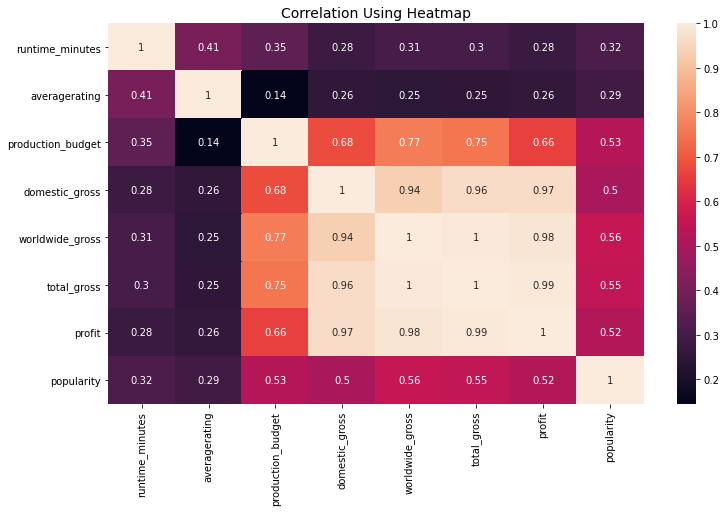

In [167]:
# plotting a heatmap to present the correlation
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_title('Correlation Using Heatmap', fontsize=14)

corr = movies.corr()
# annote True  to display the correlations on each heatmap
sns.heatmap(corr, annot = True) 
# saving the graph
plt.savefig('Correlation using Heatmap');

plt.show()

We have positive correlation between all the variables but varying in terms of strength. 

Variables with strong positive correlation are:

1. production_budget and profit with a correlation of 0.662025.

2. popularity and production_budget with a correlation of 0.527787.

3. popularity and profit with a correlation of 0.521680.                  

Variables with weak positive correlation are:

1. averagerating and runtime_minutes with a correlation of 0.405544.

2. production_budget and runtime_minutes with a correlation of 0.354355.

3. popularity and runtime_minutes with a correlation of 0.318119.

4. averagerating and popularity with a correlation of 0.294996.

5. runtime_minutes and profit with a correlation of 0.276521.

6. averagerating and profit with a correlation of 0.258633.

7. averagerating and production_budget with a correlation of 0.144862.

### 6.4.2 Relationship Between Production Budget and Total gross

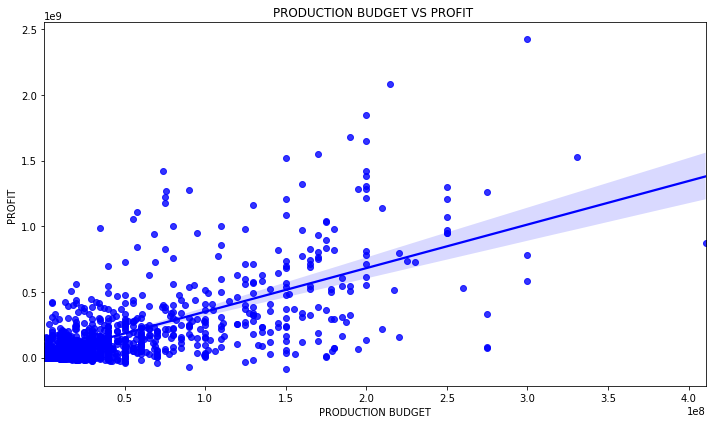

In [168]:
# Scatter plot for production budget vs total gross
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='profit', data=movies, color='b')
plt.xlabel('PRODUCTION BUDGET')
plt.ylabel('PROFIT')
plt.title('PRODUCTION BUDGET VS PROFIT ')
plt.tight_layout()
# saving the graph
plt.savefig('production budget vs profit.png');

plt.show()

The relationship between production budget and profit is a positive one. This implies that as the production budget increases, the profit tends to increase, but the relationship is not very strong.

## 7 CONCLUSION

### 7.1  What types of movie genres are doing the best at the box office?

After analyzing movie genres in terms of popularity, profitability, and budget, I found that Drama, Comedy, Action, and Adventure movies emerged as the most popular and profitable genres.

### 7.2  Which languages are doing the best at the box office ?

Based on the analysis of original languages in terms of popularity, profitability, and rating, I found that English emerged as the most popular language, followed by Danish and Telegu. In terms of profitability, Thai, Telegu, and English were the top three languages. Finally, the highest-rated languages were German, Telegu, and English.

### 7.3 Does release month affect profit ?

Yes, the months with the highest movie profits are June, May, July, November, and December. This can be attributed to School Holidays and Festive seasons in this months.

### 7.4 Is there a correlatoon  between production budget and profit ?

Yes. There a positive correlation between production budget and profit. This implies that as the production budget increases, profit also increases. Higher production budgets are associated with higher profits.

## 8. RECOMMENDATION

1. The best types of films to create are Adventure, Action and Comedy
2. The best languages for this films are Thai, Telegu, and English.
3. The best months to release the films are June, July, and November.
4. For a successful new movie studio, Microsoft should invest in both production budget and marketing. This approach will enhance film quality and promotes broader audience reach, increasing the likelihood of success and profitability.